# Exercise 5: Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data.  In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian".  In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

**Step 1:** Load the dataset _(written for you)_.

You have the array `samples` of grain samples, and a list `varieties` giving the grain variety for each sample.

In [7]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds.csv')

# extract the grain varieties from the dataframe
varieties = list(seeds_df['grain_variety'])
del seeds_df['grain_variety']

samples = seeds_df.values

**Step 2:** Import KMeans

In [2]:
from sklearn.cluster import KMeans

**Step 3:** Create a `KMeans` model called `model` with `3` clusters.


In [5]:
model = KMeans(n_clusters = 3)
model

KMeans(n_clusters=3)

**Step 4:** Use the `.fit_predict()` method of `model` to fit it to `samples` and derive the cluster labels.

Calling `.fit_predict()` is the same as calling `.fit()` and then calling `.predict()`.

In [10]:
labels = model.fit_predict(samples)

**Step 5:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values. _(This has been done for you.)_


In [17]:
#df_iris[["sepal length","sepal width","petal length","petal width"]].to_numpy
#df = pd.DataFrame([labels, varieties]).to_numpy
df = pd.DataFrame()
df["labels"] = labels
df["varieties"] = varieties

**Step 6:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [19]:
ct = pd.crosstab(df["labels"],df["varieties"])

**Step 7:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

Text(0.5, 1.0, 'Wow! 2 Distinct clusters!')

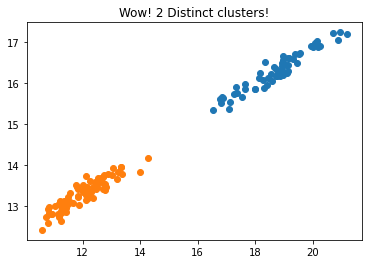

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    #data_2 = []
    for i in range(len(labels)):
        if labels[i] == 0:
            data_0.append(points[i])
        if labels[i] == 1:
            data_1.append(points[i])
#         if labels[i] == 2:
#             data_2.append(points[i])
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
#     data_2 = np.array(data_2)
    
    return data_0,data_1 #,data_2

data_0,data_1 = separate_labels(labels, samples)

plt.scatter(data_0[:,0], data_0[:,1])
plt.scatter(data_1[:,0], data_1[:,1])
plt.title("Wow! 2 Distinct clusters!")